Import packacges.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('../../../final_result_impl_dct.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

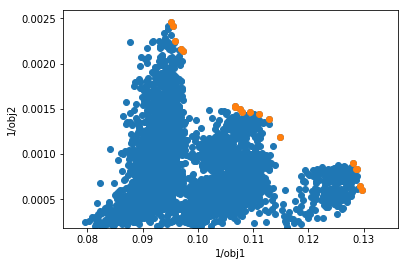

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.008224311030157569


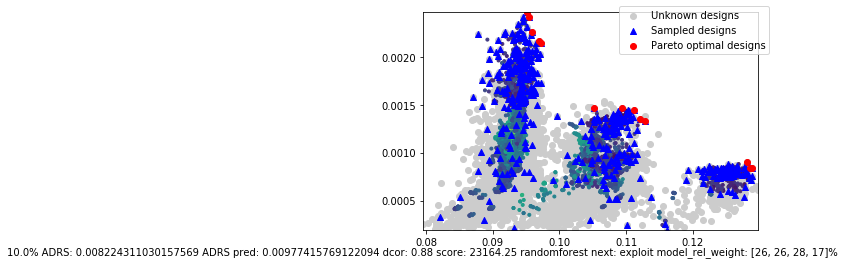

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.1),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([1365, 3413, 1373, 1397, 1367, 3075, 3139, 3079, 3587, 3083, 3091,
       4095,  771, 3335, 3327,   12, 1023,    3, 3827, 3903, 3267, 3331,
       3035, 3087, 4080, 3271, 3080, 3851, 3843, 3523, 2499, 2731, 3472,
       4032, 3264, 4035,  963,    0, 1987, 3268,  195,  199,  707, 3072,
       3272, 1011,  243, 3078, 4051, 3200, 3779,  172,  192,  961, 1219,
        211,  451, 3136, 3328, 3584, 3840, 3904, 3076,  512, 1536, 2560,
       1552, 1540, 1792,  528, 1280, 1296, 1284, 2320, 1312,  256, 1300,
       2304, 2048, 1024, 2064, 1281, 1344, 2308, 1648, 1568, 2368, 2112,
       1360,  272,  975,   16, 1040, 2176,  899,  967,  320, 3888,   48,
         32, 1088,  704,  973,  193, 2384, 1600,  816, 4034, 2432,  217,
       2848,  144,  240,   51, 3872,  336,  464, 3524,  194,  225, 2372,
       3392, 3852, 3842, 2867, 1104, 3586, 1216, 2576, 2128, 2624, 1160,
       4047,  204,  276,  268, 3344, 3520,  128,  448, 2052,  288,  260,
       1028, 1056, 2608,  783, 1044, 1267, 1376,   